In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan_data= pd.read_csv('loan_data.csv')
loan_data.head(30)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


## First Step we are studying the data.

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


## Second step we try to get some features from the given data to help us in our analysis.

#### 1) Annual income:

In [6]:
import math
loan_data['annual_income']= np.exp(loan_data['log.annual.inc'])

#### 2) The real value of the Dept:

In [7]:
loan_data['dept']= loan_data['dti'] * loan_data['annual_income']

#### 3) The real time to finish the dept in years:

In [8]:
loan_data['finish_years_dept']= (loan_data['dept'] / loan_data['installment']) / 12

In [9]:
loan_data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,dept,finish_years_dept
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,1.655800e+06,166.425442
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,9.288500e+05,339.164695
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,3.721600e+05,84.537244
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,6.885000e+05,353.424912
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,1.209576e+06,979.382040


## Third step we can get relations and data visualization to understand the data more.

#### 1) Credit policy

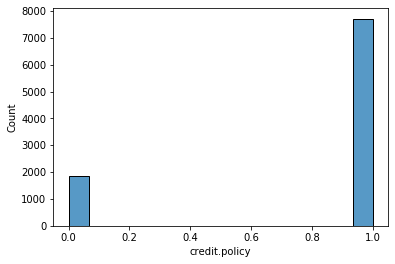

In [10]:
sns.histplot(data= loan_data, x= loan_data['credit.policy'])

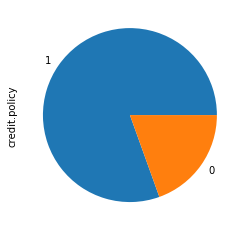

In [11]:
loan_data['credit.policy'].value_counts().plot(kind= 'pie')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

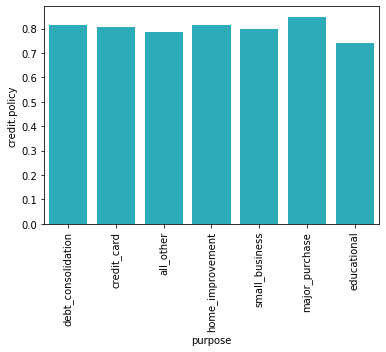

In [12]:
sns.barplot(data= loan_data, x= 'purpose', y= 'credit.policy', ci= None, color= sns.color_palette()[-1])
plt.xticks(rotation= 90)

#### 2) Purpose:

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

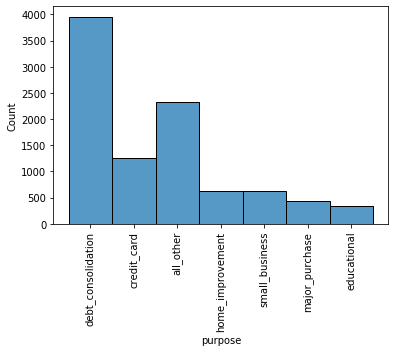

In [20]:
sns.histplot(data= loan_data, x= 'purpose',)
plt.xticks(rotation=90)

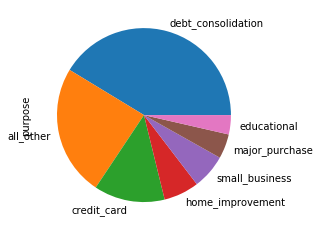

In [23]:
loan_data['purpose'].value_counts().plot(kind= 'pie')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

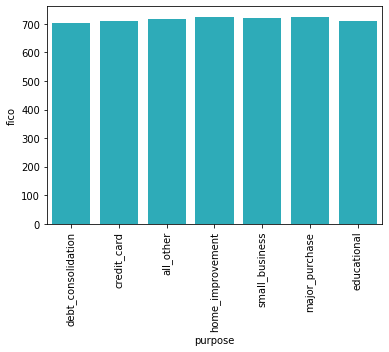

In [24]:
sns.barplot(data= loan_data, x= 'purpose', y= 'fico', ci= None, color= sns.color_palette()[-1])
plt.xticks(rotation= 90)

#### 4) FICO:

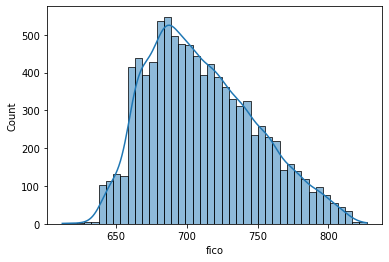

In [25]:
sns.histplot(data= loan_data, x= 'fico', kde=True)

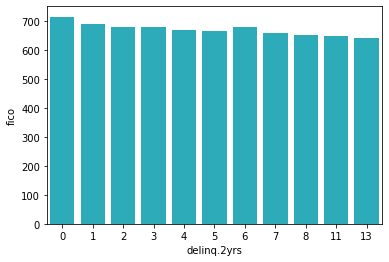

In [30]:
sns.barplot(data= loan_data, x='delinq.2yrs', y= 'fico', ci= None, color= sns.color_palette()[-1])

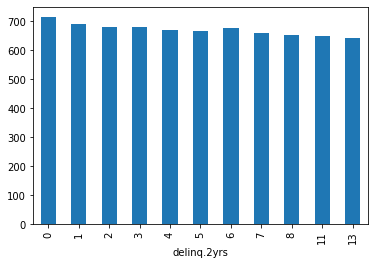

In [34]:
loan_data.groupby('delinq.2yrs')['fico'].mean().plot(kind= 'bar')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

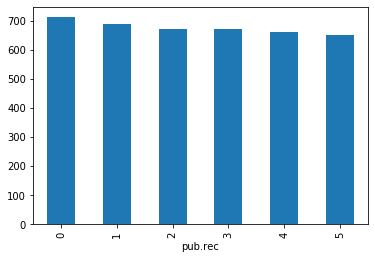

In [46]:
loan_data.groupby('pub.rec')['fico'].mean().plot(kind= 'bar')
plt.xticks(rotation= 90)

#### 5) Annual income:

In [47]:
loan_data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,dept,finish_years_dept
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,1.655800e+06,166.425442
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,9.288500e+05,339.164695
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,3.721600e+05,84.537244
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,6.885000e+05,353.424912
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,1.209576e+06,979.382040


In [50]:
loan_data['annual_income'].describe()

count    9.578000e+03
mean     6.840203e+04
std      6.122753e+04
min      1.896000e+03
25%      3.850000e+04
50%      5.576400e+04
75%      8.012100e+04
max      2.039784e+06
Name: annual_income, dtype: float64

In [57]:
loan_data['annual_income_category']=pd.cut(loan_data['annual_income'], bins= [loan_data['annual_income'].min(), 70000, 150000, 200000, loan_data['annual_income'].max()], labels= ['low', 'medium', 'high', 'very.high'])

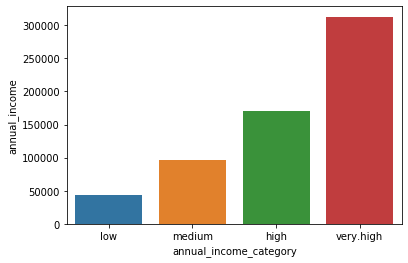

In [58]:
sns.barplot(data= loan_data, x= 'annual_income_category', y='annual_income', ci= None)

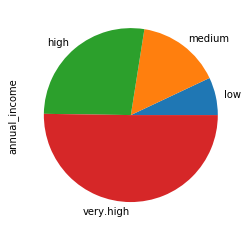

In [59]:
loan_data.groupby('annual_income_category')['annual_income'].mean().plot(kind= 'pie')

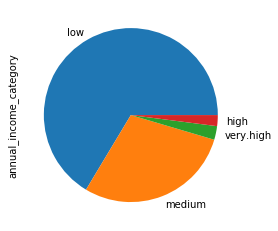

In [60]:
loan_data['annual_income_category'].value_counts().plot(kind= 'pie')